## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousecombined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID",  how ="outer")

# Display the data table for preview
mousecombined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice in the DataFrame.
print("There are", len(mousecombined_df), "records in the dataframe")
    
mousecombineduniquecount = len(mousecombined_df["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")


There are 1893 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


In [18]:
mousecombined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseduplicates = mousecombined_df[['Mouse ID', 'Timepoint']]
mouseduplicates = mouseduplicates[mouseduplicates.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicates


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseduplicatesfull = mousecombined_df[mousecombined_df.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicatesfull

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicateindex = mouseduplicatesfull.index
duplicateindex


Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [22]:

#Drop the duplicate IDs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
mouseclean = mousecombined_df.drop(mousecombined_df.index[[duplicateindex]])

mouseclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(mouseclean), "records in the dataframe")

#number of unique records
mousecombineduniquecount = len(mouseclean["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")


There are 1888 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
regimenmean = mouseregimengroup["Tumor Volume (mm3)"].mean()
regimenmedian = mouseregimengroup["Tumor Volume (mm3)"].median()
regimenvar = mouseregimengroup["Tumor Volume (mm3)"].var()
regimenstd = mouseregimengroup["Tumor Volume (mm3)"].std()
regimensem = mouseregimengroup["Tumor Volume (mm3)"].sem()

meanseries = pd.Series(regimenmean) 
medianseries = pd.Series(regimenmedian) 
  
summarycombined = {"Mean Tumor Volume (mm3)":regimenmean,
               "Median Tumor Volume (mm3)": regimenmedian,
               "Variance Tumor Volume (mm3)": regimenvar,
               "Standard Deviation Tumor Volume (mm3)": regimenstd,
               "SEM Tumor Volume (mm3)": regimensem
}

Regimen_Tumor_Volume_Summary_One = pd.DataFrame(summarycombined)
Regimen_Tumor_Volume_Summary_One

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouseregimengroup = mouseclean.groupby(["Drug Regimen"])
regimensummary = mouseregimengroup["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
                   

Regimen_Tumor_Volume_Summary_Two = regimensummary.rename(columns={
    "mean":"Mean Tumor Volume (mm3)",
    "median":"Median Tumor Volume (mm3)",
    "var":"Variance Tumor Volume (mm3)",
    "std":"Standard Deviation Tumor Volume (mm3)",
    "sem":"SEM Tumor Volume (mm3)"
})

Regimen_Tumor_Volume_Summary_Two

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of mice')

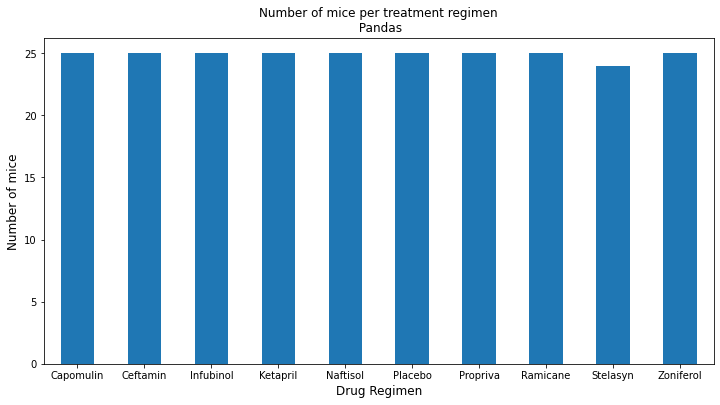

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
regimenmice = mouseregimengroup["Mouse ID"].nunique()

#Y axis = number of mice
regimenY = regimenmice.values.tolist()

#X azis = regimen
regimenX = regimenmice.index.tolist()

regimenmice.plot.bar(figsize=(12,6), width=.5, rot=0, title='Number of mice per treatment regimen\n Pandas')
plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
plt.ylabel("Number of mice", fontdict={'fontsize':12})

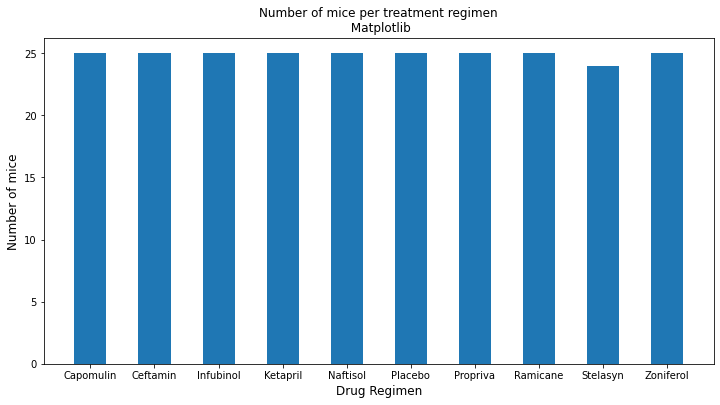

In [27]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(12,6))
plt.bar(regimenX, regimenY, width=.5,)
plt.title('Number of mice per treatment regimen\n Matplotlib')
plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
plt.ylabel('Number of mice', fontdict={'fontsize':12})

plt.show()

## Pie Plots

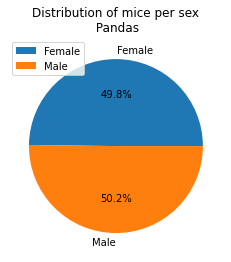

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mousesexgroup = mouseclean.groupby(["Sex"])
mousesexcount = mousesexgroup["Mouse ID"].nunique()
labels = ["Female", "Male"]

mousesexcount.plot.pie(title='Distribution of mice per sex\n Pandas', autopct="%1.1f%%")
plt.ylabel('')
plt.legend(loc=2)

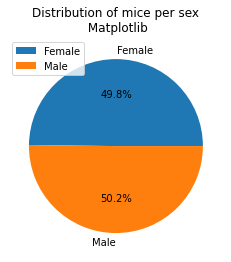

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mousesexcount, autopct="%1.1f%%", labels=labels)
plt.title('Distribution of mice per sex\n Matplotlib')
plt.legend(loc = 2)
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = mouseclean.groupby(["Mouse ID"]).last()
lasttimepoint

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#isolate the four of the treatment regimens - # Capomulin, Ramicane, Infubinol, and Ceftamin
lastimetopfour = lasttimepoint.loc[(lasttimepoint["Drug Regimen"]=="Capomulin") | (lasttimepoint["Drug Regimen"]=="Ramicane") | (lasttimepoint["Drug Regimen"]=="Infubinol") | (lasttimepoint["Drug Regimen"]=="Ceftamin") ,:]
lastimetopfour

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)

topfourtreatmentslist = list(lastimetopfour['Drug Regimen'].unique())
topfourtreatmentslist

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [33]:
# Create empty list to fill with tumor vol data (for plotting)

mylist = []

In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

for regimen in topfourtreatmentslist:
    regimenvolumedate = lastimetopfour.loc[lastimetopfour["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    
    #https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
            
    mouseid = regimenvolumedate.index.tolist()
    idvalues = regimenvolumedate.values.tolist()
    
    mylist.append(idvalues)
    
    #Define the quartiles
    mousequartile = regimenvolumedate.quantile([.25,.5,.75])
    
    #Store quartile, iqr and lower and upper bound ranges
    mouselowerq = mousequartile[0.25]
    mouseupperq = mousequartile[0.75]
    mouseiqr = mouseupperq-mouselowerq
    mouselower_bound = mouselowerq - (1.5*mouseiqr)
    mouseupper_bound = mouseupperq + (1.5*mouseiqr)
    
    print(regimen)
    print(f" Lower quartile of final tumor volume is: {mouselowerq.round(2)} (mm3)")
    print(f" Upper quartile of final tumor volume is: {mouseupperq.round(2)} (mm3)")
    print(f" Interquartile range of final tumor volume is: {mouseiqr.round(2)} (mm3)")
    print(f" Median range of final tumor volume is: {mousequartile[.5].round(2)} (mm3)")
    print(f" Values below {mouselower_bound.round(2)} (mm3) could be outliers.")
    print(f" Values above {mouseupper_bound.round(2)} (mm3) could be outliers.\n")

Infubinol
 Lower quartile of final tumor volume is: 54.05 (mm3)
 Upper quartile of final tumor volume is: 65.53 (mm3)
 Interquartile range of final tumor volume is: 11.48 (mm3)
 Median range of final tumor volume is: 60.17 (mm3)
 Values below 36.83 (mm3) could be outliers.
 Values above 82.74 (mm3) could be outliers.

Ceftamin
 Lower quartile of final tumor volume is: 48.72 (mm3)
 Upper quartile of final tumor volume is: 64.3 (mm3)
 Interquartile range of final tumor volume is: 15.58 (mm3)
 Median range of final tumor volume is: 59.85 (mm3)
 Values below 25.36 (mm3) could be outliers.
 Values above 87.67 (mm3) could be outliers.

Ramicane
 Lower quartile of final tumor volume is: 31.56 (mm3)
 Upper quartile of final tumor volume is: 40.66 (mm3)
 Interquartile range of final tumor volume is: 9.1 (mm3)
 Median range of final tumor volume is: 36.56 (mm3)
 Values below 17.91 (mm3) could be outliers.
 Values above 54.31 (mm3) could be outliers.

Capomulin
 Lower quartile of final tumor volu

In [35]:
#created dataframe to confirm tumor volume data looking correct
   
volumedataframe = pd.DataFrame(mylist)
volumedataframe = volumedataframe.transpose()
volumedataframe.columns = topfourtreatmentslist

volumedataframe

,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220
5,36.321346,47.784682,33.397653,47.685963
6,60.969711,61.849023,37.311236,37.311846
7,62.435404,68.923185,40.659006,38.125164
8,60.918767,67.748662,29.128472,38.753265
9,67.289621,57.918381,33.562402,41.483008


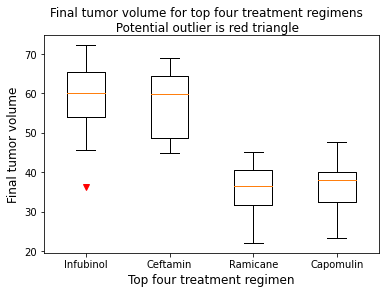

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
fig.suptitle('Final tumor volume for top four treatment regimens\n Potential outlier is red triangle', fontsize=12)
ax.boxplot(mylist, sym="rv")
ax.set_xticklabels(topfourtreatmentslist)
ax.set_xlabel('Top four treatment regimen', fontsize=12)
ax.set_ylabel('Final tumor volume', fontsize=12)
plt.show()

## Line and Scatter Plots

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
print("The selected mouse for the line plot is " + lastimetopfour.loc[lastimetopfour["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"].idxmin() )


The selected mouse for the line plot is s185


In [38]:
Capomulinmouse = mouseclean.loc[mouseclean["Mouse ID"]=="s185", :]
Capomulinmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


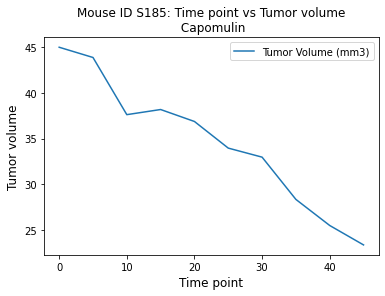

In [39]:
Capomulinmouse.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.title('Mouse ID S185: Time point vs Tumor volume\n Capomulin')
plt.xlabel('Time point',fontdict={'fontsize':12})
plt.ylabel('Tumor volume', fontdict={'fontsize':12})
plt.show()

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
CapomulinFullData = mouseclean.loc[mouseclean["Drug Regimen"]=="Capomulin",:]


    #Create a series for the average tumor volume for each mouse in Capomulin
mouseIDgroup = CapomulinFullData.groupby(["Mouse ID"])
mousetumoraverage = mouseIDgroup["Tumor Volume (mm3)"].mean()

    #get a series of mouse weights
mousetumorweight = mouseIDgroup["Weight (g)"].unique()

    #Needed to reconvert weight valules to strings
mousetumorweight = mousetumorweight.str[0]

    #Check data
print(mousetumorweight, mousetumoraverage)


Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64 Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64


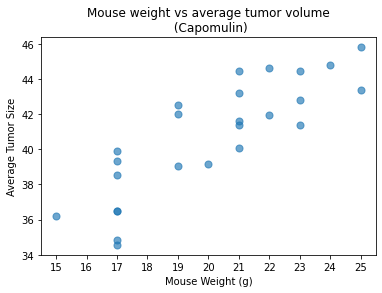

In [44]:
#Scatterplot
    #x-axis weight
    #y-axis tumor volume

    #To make a neat x axis labels
xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)

    #Make points larger and transparent to show overlapping points for mice of 17g
plt.scatter(mousetumorweight, mousetumoraverage, s=50, alpha=0.65)
plt.title('Mouse weight vs average tumor volume\n (Capomulin)')
plt.xticks(xweight)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mousecorrelation = st.pearsonr (mousetumorweight, mousetumoraverage)
print(f"The correlation of coefficient between mouse weight and average tumor volume for the Capomulin treatment is {mousecorrelation[0].round(2)}.")

The correlation of coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.84.


In [46]:
#linear regression 

mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mousetumorweight, mousetumoraverage)
    #check outcome
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err

(0.9544396890241045,
 21.552160532685015,
 0.8419363424694718,
 1.3225722434712642e-07,
 0.1275435903320134)

In [47]:
# Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
mouse_fit = mouse_slope * xweight + mouse_int
#check outcome
mouse_fit

array([35.86875587, 36.82319556, 37.77763525, 38.73207494, 39.68651462,
       40.64095431, 41.595394  , 42.54983369, 43.50427338, 44.45871307,
       45.41315276])

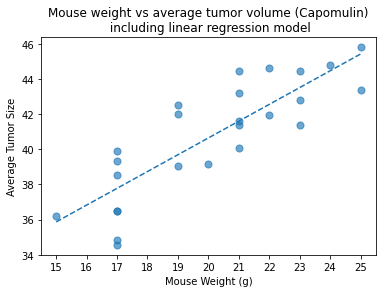

In [48]:

#Scatterplot with linear regression model

xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)


plt.scatter(mousetumorweight,mousetumoraverage, s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xweight, mouse_fit, "--")
plt.xticks(xweight)
plt.title('Mouse weight vs average tumor volume (Capomulin)\n including linear regression model')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()